### imports

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

### topic count for different data stages
topic_dist

In [2]:
names_topic_dist = ['Weather Extremes', 'Global stance', 'Importance of Human Intervantion', 'Seriousness of Gas Emissions', 'Donald Trump versus Science',
                    'Politics', 'Ideological Positions on Global Warming', 'Undefined / One Word Hashtags', 'Impact of Resource Overconsumption', 'Significance of Pollution Awareness Events']
original_topic_dist = [2464814, 4135619, 2594941, 903478, 996244, 1809583, 602695, 1305118, 496924, 479995]
sampled_dopic_dist = [294710, 518997, 320291, 108138, 120519, 222817, 71593, 167454, 58958, 58961]
statement_topic_dist = [17095, 36494, 15182, 5824, 7851, 12404, 1441, 7263, 2634, 3059]
classified_topic_dist = [13177, 21577, 8062, 4146, 4567, 5755, 1091, 5993, 1851, 2064]

topic_dict = {
    'original': original_topic_dist,
    'sampled': sampled_dopic_dist,
    'statement': statement_topic_dist,
    'deduplicated': classified_topic_dist
}

topic_data = pd.DataFrame.from_dict(topic_dict, 'index')
topic_data.columns = names_topic_dist

topic_data.head()

,Weather Extremes,Global stance,Importance of Human Intervantion,Seriousness of Gas Emissions,Donald Trump versus Science,Politics,Ideological Positions on Global Warming,Undefined / One Word Hashtags,Impact of Resource Overconsumption,Significance of Pollution Awareness Events
original,2464814,4135619,2594941,903478,996244,1809583,602695,1305118,496924,479995
sampled,294710,518997,320291,108138,120519,222817,71593,167454,58958,58961
statement,17095,36494,15182,5824,7851,12404,1441,7263,2634,3059
deduplicated,13177,21577,8062,4146,4567,5755,1091,5993,1851,2064


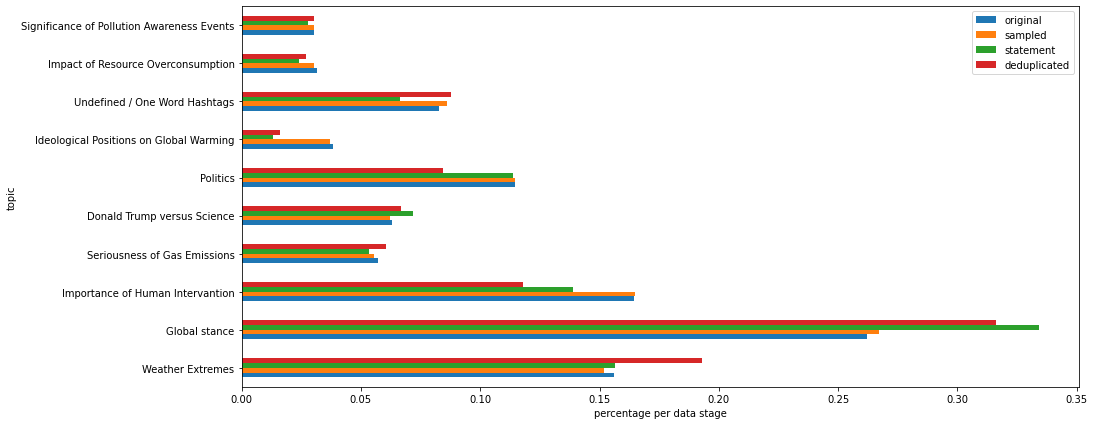

In [3]:
topic_data_percent = topic_data.div(topic_data.sum(axis=1), axis=0)

ax = topic_data_percent.T.plot.barh(figsize=(15,7))
ax.set_ylabel('topic')
ax.set_xlabel('percentage per data stage')
ax.figure.savefig('plots/topic_dist.png', bbox_inches='tight')

### statement quality
regex_count

In [4]:
# load data to dataframe
statement_quality_data = pd.read_csv('data/random_statement_sample_manually_classified.csv', sep=',', header=0)

regex_mapping = {
    1: 'future',
    2: 'in [\d]* years',
    3: '[\d] years from now',
    4: '(predicts?)|(predictions?)|(predicted)',
    5: 'will be|(is)? going to (be)?',
    6: '(could)|(might)( not)?( be)?',
    7: '(won\'t be)|(will not? longer (be)?)'
}

regex_used = []
for index, row in statement_quality_data.iterrows():
    tweet = row['text']
    if re.search(r'future', tweet):
        regex_used.append(1)

    elif re.search(r'in [\d]* years', tweet):
        regex_used.append(2)

    elif re.search(r'[\d] years from now', tweet):
        regex_used.append(3)

    elif re.search(r'(predicts?)|(predictions?)|(predicted)', tweet):
        regex_used.append(4)

    elif re.search(r'will be|(is)? going to (be)?', tweet):
        regex_used.append(5)

    elif re.search(r'(could)|(might)( not)?( be)?', tweet):
        regex_used.append(6)

    elif re.search(r'(won\'t be)|(will not? longer (be)?)', tweet):
        regex_used.append(7)

assert len(regex_used) == 300

statement_quality_data['regex'] = regex_used

statement_quality_data['statement_about_future'].value_counts()

y    165
n    135
Name: statement_about_future, dtype: int64

In [5]:
statement_quality_data['regex'].replace(regex_mapping, inplace=True)
statement_quality_data['statement_about_future'].replace({'y': 'yes', 'n': 'no'}, inplace=True)
statement_regex_data = statement_quality_data.groupby(['regex', 'statement_about_future'])['regex'].count().unstack('statement_about_future')

statement_regex_data

statement_about_future,no,yes
regex,,
(could)|(might)( not)?( be)?,55.0,67.0
(predicts?)|(predictions?)|(predicted),11.0,6.0
(won't be)|(will not? longer (be)?),1.0,2.0
[\d] years from now,NaN,1.0
future,35.0,13.0
in [\d]* years,5.0,11.0
will be|(is)? going to (be)?,28.0,65.0


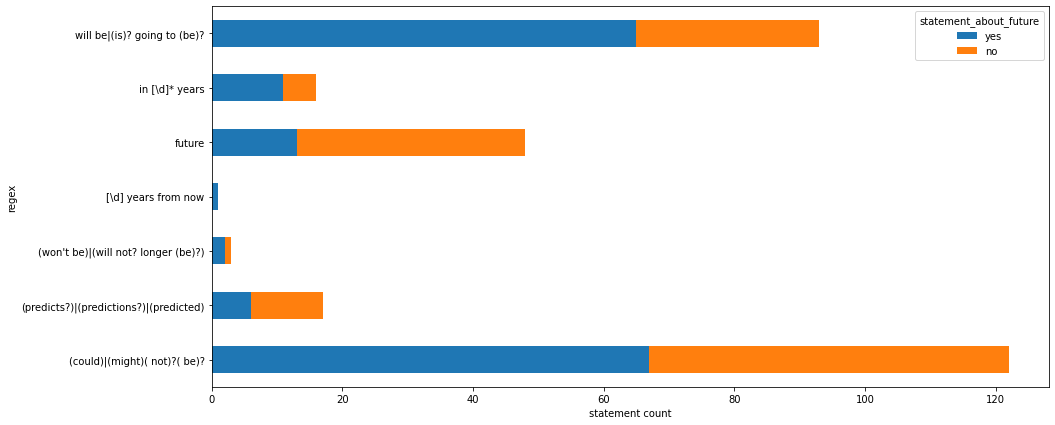

In [6]:
ax = statement_regex_data[['yes','no']].plot(kind='barh', stacked=True, figsize=(15,7))
ax.set_xlabel('statement count')
ax.figure.savefig('plots/regex_count.png', bbox_inches='tight')

#### long output to search for examples

In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(statement_quality_data[['text', 'statement_about_future', 'regex']])

# negative examples
# future:                       whole day under burning sun. global warming is horribly effecting. l'm horrified by thinking future situation of... LINK
# (could)|(might)( not)?( be)?: sure could use some global warming about now.
# 
# positive example:
# will be|(is)? going to (be)?: the temperature of the earth is going to increase 4°c more for the  next 10 years due to global warming.we shou… LINK
# in [\d]* years:               in 50 years from now aliens will be underwater due to global warming and we will be full of contempt. what a deligh… LINK

,text,statement_about_future,regex
0,study to predict climate change.: academics in...,no,(predicts?)|(predictions?)|(predicted)
1,sure could use some global warming about now.,no,(could)|(might)( not)?( be)?
2,please bring on the global warming. tulsa is ...,yes,will be|(is)? going to (be)?
3,american corporates get antsy about climate ch...,no,will be|(is)? going to (be)?
4,i'm not a greenie. don't care much about globa...,no,will be|(is)? going to (be)?
5,drinks at parli house with the wongster. i'm t...,yes,will be|(is)? going to (be)?
6,"it's so serious, it's so morally weighted that...",no,(could)|(might)( not)?( be)?
7,bbc: protecting societies against impacts of c...,yes,will be|(is)? going to (be)?
8,climate change - water resources will be signi...,yes,will be|(is)? going to (be)?
9,amazing climate change video! LINK to quote ca...,no,future


### time data

#### weekly TextBlob
tb_score_time

In [3]:
classified_data = pd.read_csv('data/classified_data.csv', sep=',', header=0)
classified_data['created_at'] = pd.to_datetime(classified_data['created_at'])

In [9]:
data_week = classified_data.copy()
data_week.index = data_week['created_at']
data_week = data_week.groupby(pd.Grouper(freq='W')).mean()

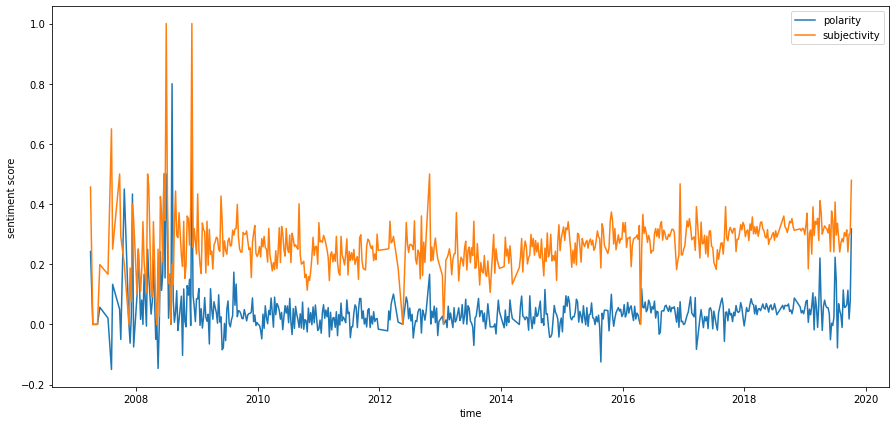

In [10]:
fig, ax = plt.subplots(figsize=(15,7))
sns.lineplot(x='created_at', y='tb_polarity', data=data_week, ax=ax)
sns.lineplot(x='created_at', y='tb_subjectivity', data=data_week, ax=ax)

plt.legend(['polarity', 'subjectivity'])
plt.xlabel('time')
plt.ylabel('sentiment score')

plt.savefig('plots/tb_score_time.png', bbox_inches='tight')

#### weekly posts
posts_per_week

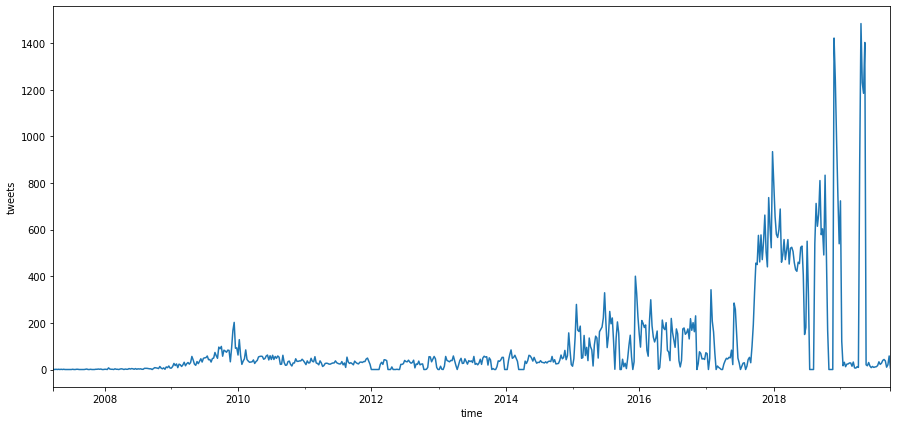

In [11]:
data_week = classified_data.copy()
data_week.index = data_week['created_at']
data_week = data_week.groupby(pd.Grouper(freq='W')).size()

ax = data_week.plot.line(figsize=(15,7))
ax.set_xlabel('time')
ax.set_ylabel('tweets')
ax.figure.savefig('plots/posts_per_week.png', bbox_inches='tight')

### Weekly sentiment (hf score merged)

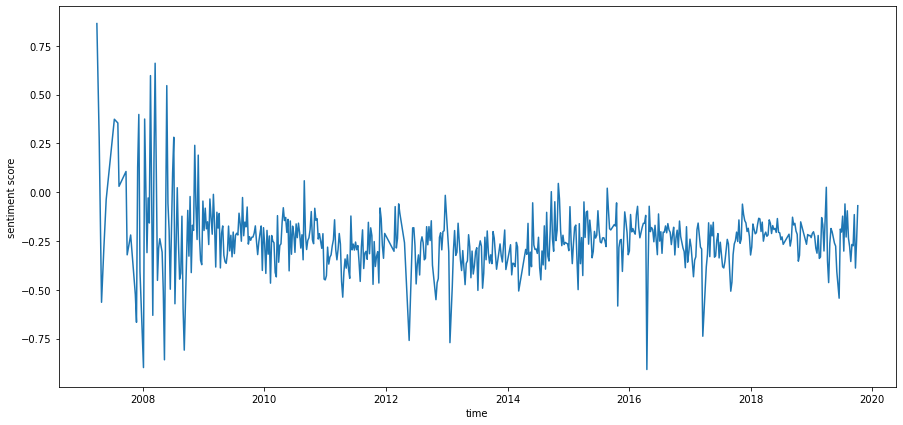

In [4]:
merged_label = classified_data['hf_score_neg'] * -1.0 + classified_data['hf_score_neutral'] * 0.0 + classified_data['hf_score_pos'] * 1.0
classified_data['hf_score_merged'] = merged_label
data_week = classified_data.copy()
data_week.index = data_week['created_at']
data_week = data_week.groupby(pd.Grouper(freq='W')).mean()

fig, ax = plt.subplots(figsize=(15,7))
sns.lineplot(x='created_at', y='hf_score_merged', data=data_week, ax=ax)

plt.xlabel('time')
plt.ylabel('sentiment score')

plt.savefig('plots/hf_sent_score_time.png', bbox_inches='tight')

#### stance per month
stance_per_month

In [12]:
data_month = classified_data.copy()
data_month.index = data_month['created_at']
data_month = data_month.groupby(pd.Grouper(freq='M'))['stance'].value_counts().unstack('stance').fillna(0)

data_month

stance,believer,denier,neutral
created_at,,,
2007-03-31 00:00:00+00:00,1.0,0.0,0.0
2007-04-30 00:00:00+00:00,2.0,0.0,0.0
2007-05-31 00:00:00+00:00,1.0,0.0,1.0
2007-07-31 00:00:00+00:00,1.0,0.0,0.0
2007-08-31 00:00:00+00:00,2.0,0.0,0.0
...,...,...,...
2019-06-30 00:00:00+00:00,51.0,5.0,10.0
2019-07-31 00:00:00+00:00,51.0,4.0,8.0
2019-08-31 00:00:00+00:00,123.0,13.0,13.0


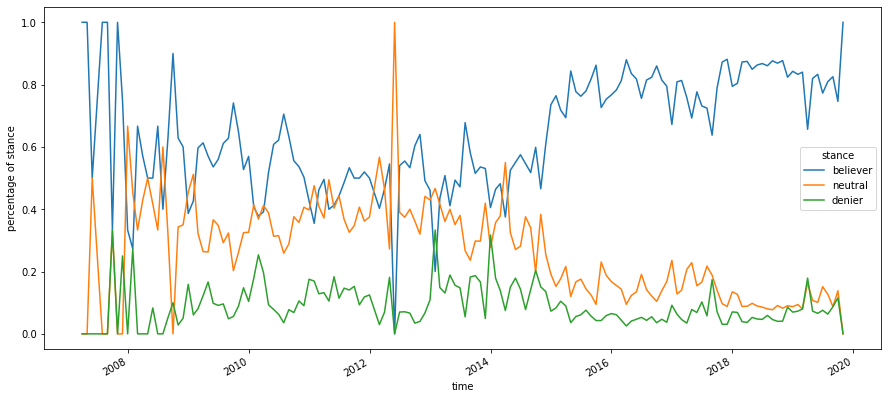

In [13]:
data_month_percent = data_month.div(data_month.sum(axis=1), axis=0)

ax = data_month_percent[['believer', 'neutral', 'denier']].plot(kind='line', figsize=(15,7))
ax.set_xlabel('time')
ax.set_ylabel('percentage of stance')
ax.figure.savefig('plots/stance_per_month.png', bbox_inches='tight')

#### aggressiveness
aggro_per_month

In [14]:
data_month = classified_data.copy()
data_month.index = data_month['created_at']
data_month = data_month.groupby(pd.Grouper(freq='M'))['aggressiveness'].value_counts().unstack('aggressiveness').fillna(0)

data_month

aggressiveness,aggressive,not aggressive
created_at,,
2007-03-31 00:00:00+00:00,0.0,1.0
2007-04-30 00:00:00+00:00,1.0,1.0
2007-05-31 00:00:00+00:00,1.0,1.0
2007-07-31 00:00:00+00:00,0.0,1.0
2007-08-31 00:00:00+00:00,1.0,1.0
...,...,...
2019-06-30 00:00:00+00:00,25.0,41.0
2019-07-31 00:00:00+00:00,7.0,56.0
2019-08-31 00:00:00+00:00,16.0,133.0


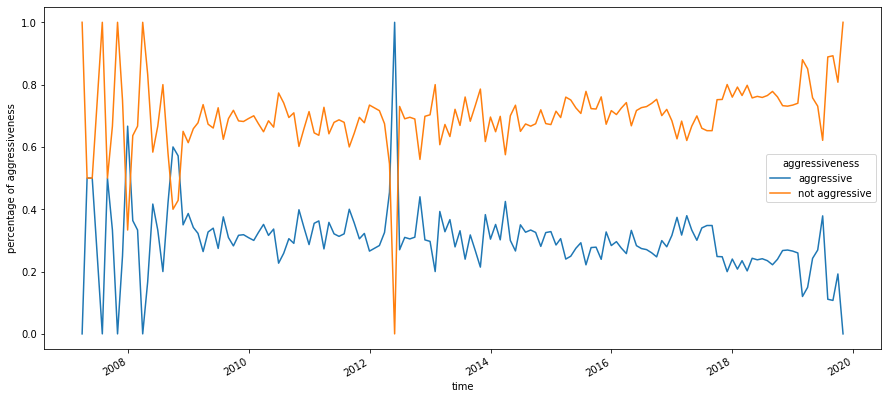

In [15]:
data_month_percent = data_month.div(data_month.sum(axis=1), axis=0)

ax = data_month_percent[['aggressive', 'not aggressive']].plot(kind='line', figsize=(15,7))
ax.set_xlabel('time')
ax.set_ylabel('percentage of aggressiveness')
ax.figure.savefig('plots/aggro_per_month.png', bbox_inches='tight')

### sentiment comparison

In [45]:
classified_data = pd.read_csv('data/classified_data.csv', sep=',', header=0)

merged_label = classified_data['hf_score_neg'] * -1.0 + classified_data['hf_score_neutral'] * 0.0 + classified_data['hf_score_pos'] * 1.0
classified_data['hf_score_merged'] = merged_label

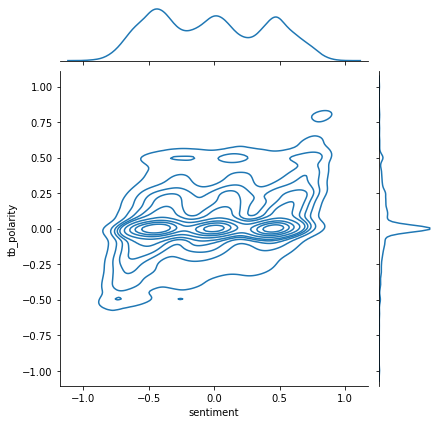

In [22]:
# compare TextBlob with sentiment
kde_jointplot = sns.jointplot(x="sentiment", y="tb_polarity", data=classified_data, kind='kde')
kde_jointplot.fig.savefig('plots/sentiment_tb_comp', bbox_inches='tight')

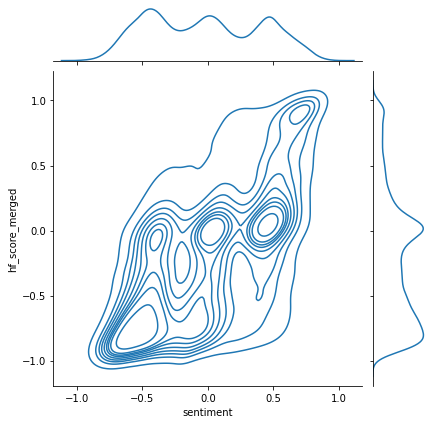

In [46]:
# compare hf model with sentiment
kde_jointplot = sns.jointplot(x="sentiment", y="hf_score_merged", data=classified_data, kind='kde')
kde_jointplot.fig.savefig('plots/sentiment_hf_comp', bbox_inches='tight')

### temperature influence on sentiment

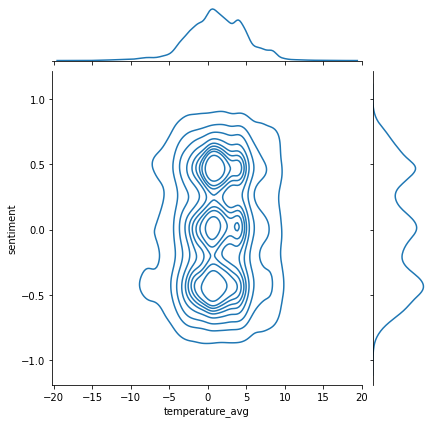

In [31]:
# temperature influence on sentiement
kde_jointplot = sns.jointplot(x="temperature_avg", y="sentiment", data=classified_data, kind='kde')
kde_jointplot.fig.savefig('plots/temp_sent_comp', bbox_inches='tight')

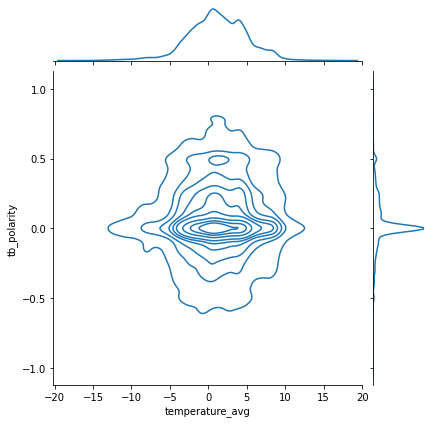

In [32]:
# temperature influence on tb_polarity
kde_jointplot = sns.jointplot(x="temperature_avg", y="tb_polarity", data=classified_data, kind='kde')
kde_jointplot.fig.savefig('plots/temp_tb_comp', bbox_inches='tight')

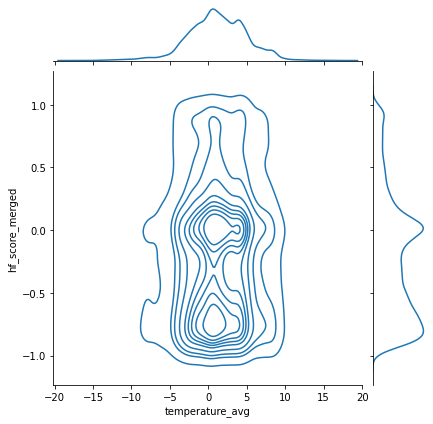

In [47]:
# temperature influence on hf_merged_score
kde_jointplot = sns.jointplot(x="temperature_avg", y="hf_score_merged", data=classified_data, kind='kde')
kde_jointplot.fig.savefig('plots/temp_hf_comp', bbox_inches='tight')

<AxesSubplot:xlabel='temperature_avg', ylabel='hf_label'>

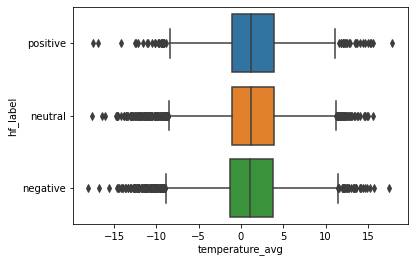

In [38]:
# temperature influence on stance
sns.boxplot(x='temperature_avg', y='hf_label', data=classified_data)

<AxesSubplot:xlabel='temperature_avg', ylabel='stance'>

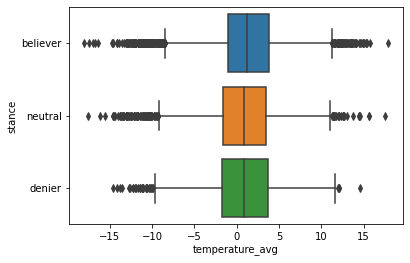

In [43]:
# temperature influence on stance
sns.boxplot(x='temperature_avg', y='stance', data=classified_data)